In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('all_shots_v5.csv')

In [3]:
df.head()

,Unnamed: 0,Shot Distance,X Location,Y Location,Away Team,Season Type,Year,Shot Zone Basic_Above the Break 3,Shot Zone Basic_Backcourt,Shot Zone Basic_In The Paint (Non-RA),...,PG-SG,SF,SF-SG,SG,SG-PG,E_DEF_RATING,E_OFF_RATING,PCT_PREV_ACTION,PCT_AREA,YEARS_EXP
0,0,19.0,-107.0,167.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
1,1,21.0,-115.0,177.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
2,2,16.0,165.0,13.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,35.089974,3.0
3,3,15.0,0.0,150.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,56.465873,0.749611,3.0
4,4,15.0,0.0,150.0,PHI,0.0,2000.0,False,False,False,...,0.0,0.0,0.0,1.0,0.0,95.5,100.7,76.724138,0.749611,3.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Shot Distance', 'X Location', 'Y Location', 'Away Team',
       'Season Type', 'Year', 'Shot Zone Basic_Above the Break 3',
       'Shot Zone Basic_Backcourt', 'Shot Zone Basic_In The Paint (Non-RA)',
       'Shot Zone Basic_Left Corner 3', 'Shot Zone Basic_Mid-Range',
       'Shot Zone Basic_Restricted Area', 'Shot Zone Basic_Right Corner 3',
       'Shot Zone Area_Back Court(BC)', 'Shot Zone Area_Center(C)',
       'Shot Zone Area_Left Side Center(LC)', 'Shot Zone Area_Left Side(L)',
       'Shot Zone Area_Right Side Center(RC)', 'Shot Zone Area_Right Side(R)',
       'Shot Zone Range_16-24 ft.', 'Shot Zone Range_24+ ft.',
       'Shot Zone Range_8-16 ft.', 'Shot Zone Range_Back Court Shot',
       'Shot Zone Range_Less Than 8 ft.', 'GAME_ID', 'EVENTNUM', 'target',
       'PERIOD', 'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'OPPONENT_TEAM',
       'at_home', 'PREVIOUS_OFF_REBOUND', 'PREVIOUS_DEF_REBOUND',
       'PREVIOUS_OFF_TURNOVER', 'PREVIOUS_OFF_MISSED', 

In [5]:
df['target'].value_counts(normalize=True)

target
1    0.56383
0    0.43617
Name: proportion, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439450 entries, 0 to 439449
Data columns (total 78 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             439450 non-null  int64  
 1   Shot Distance                          439450 non-null  float64
 2   X Location                             439450 non-null  float64
 3   Y Location                             439450 non-null  float64
 4   Away Team                              439450 non-null  object 
 5   Season Type                            439450 non-null  float64
 6   Year                                   439450 non-null  float64
 7   Shot Zone Basic_Above the Break 3      439450 non-null  bool   
 8   Shot Zone Basic_Backcourt              439450 non-null  bool   
 9   Shot Zone Basic_In The Paint (Non-RA)  439450 non-null  bool   
 10  Shot Zone Basic_Left Corner 3          439450 non-null  

**::::::::::::::::::::::: LeNet :::::::::::::::::::::::::**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, Input

# Step 1: Drop unnecessary columns and create new index
df_updated = df.drop(columns=['Unnamed: 0', 'year_start', 'year_end'])
df_updated['GAME_ID_EVENTNUM'] = df_updated['GAME_ID'].astype(str) + '_' + df_updated['EVENTNUM'].astype(str)
df_updated.set_index('GAME_ID_EVENTNUM', inplace=True)
df_updated = df_updated.drop(columns=['GAME_ID', 'EVENTNUM'])

# Step 2: Separate target and features
X = df_updated.drop(columns=['target'])
y = df_updated['target']

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Identify categorical columns (object type columns)
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Step 5: Define preprocessing for numerical and categorical features
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 6: Apply preprocessing (OneHotEncoding for categorical and scaling for numeric)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ])

# Step 7: Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Step 8: Apply undersampling to balance the classes
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train_transformed, y_train)

# Step 9: Reshape the data for Conv1D (ensure you have a 3D shape for input to Conv1D)
X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))
X_test_transformed = X_test_transformed.reshape((X_test_transformed.shape[0], X_test_transformed.shape[1], 1))

# Step 10: Build the LeNet model (Conv1D)
model = Sequential([
    Input(shape=(X_resampled.shape[1], 1)),  # Use Input layer to define the shape
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Step 11: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 12: Train the model (on undersampled data)
history = model.fit(
    X_resampled, y_resampled,  # Use the undersampled data
    epochs=100,
    batch_size=32,
    validation_data=(X_test_transformed, y_test.to_numpy())
)

# Step 13: Evaluate the model
test_loss, test_acc = model.evaluate(X_test_transformed, y_test.to_numpy())
print(f"Test accuracy: {test_acc}")


Epoch 1/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.6755 - loss: 0.6058 - val_accuracy: 0.6800 - val_loss: 0.5930
Epoch 2/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.6863 - loss: 0.5970 - val_accuracy: 0.6854 - val_loss: 0.5897
Epoch 3/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.6883 - loss: 0.5936 - val_accuracy: 0.6793 - val_loss: 0.5908
Epoch 4/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - accuracy: 0.6914 - loss: 0.5912 - val_accuracy: 0.6765 - val_loss: 0.5978
Epoch 5/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.6932 - loss: 0.5904 - val_accuracy: 0.6797 - val_loss: 0.5919
Epoch 6/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - accuracy: 0.6929 - loss: 0.5879 - val_accuracy: 0.6820 - val_loss: 0.5942
Epoch 7/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 95s 10ms/step - accuracy: 0.6952 - loss: 0.5867 - val_accuracy: 0.6843 - val_loss: 0.5863
Epoch 8/100
9591/9591 ━━━━━━━━━━━━━━━━━━━━ 88s 9ms/step - accuracy: 0.6949 

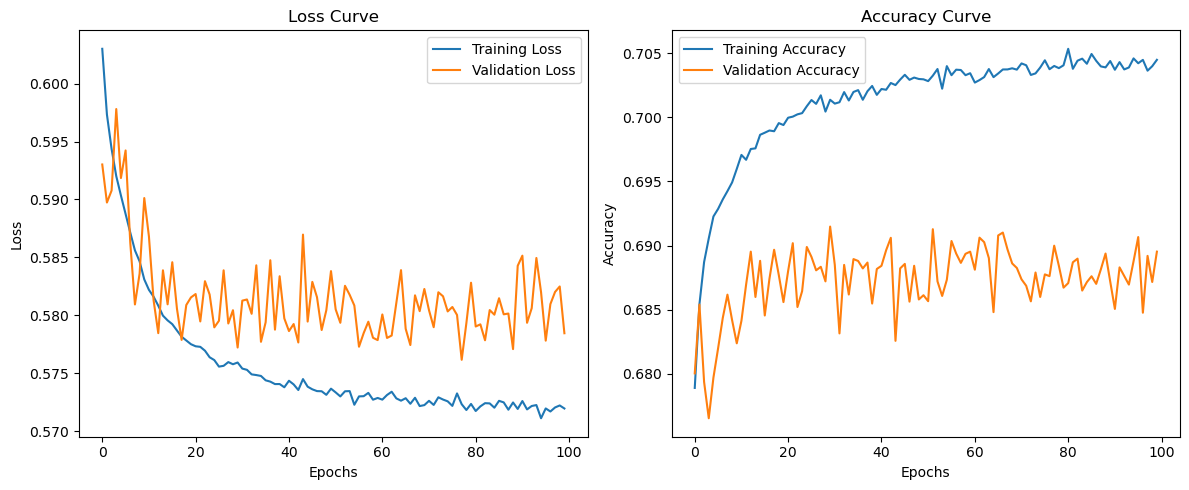

In [8]:
import matplotlib.pyplot as plt

# Retrieve loss and accuracy values from history
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss
accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

# Create a figure with two subplots: one for loss and one for accuracy
plt.figure(figsize=(12, 5))

# Plot Loss (Cost) curve
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


2747/2747 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


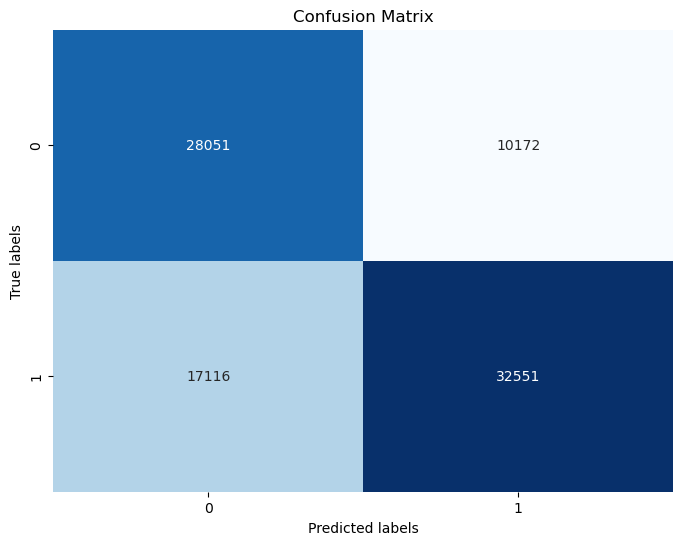

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
y_pred = model.predict(X_test_transformed)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary 0 or 1

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Step 3: Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [10]:
from sklearn.metrics import classification_report

# Step 1: Predict on the test set
y_pred = model.predict(X_test_transformed)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary 0 or 1

# Step 2: Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1'])

# Step 3: Print the classification report
print(report)


2747/2747 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.62      0.73      0.67     38223
     Class 1       0.76      0.66      0.70     49667

    accuracy                           0.69     87890
   macro avg       0.69      0.69      0.69     87890
weighted avg       0.70      0.69      0.69     87890

